In [30]:
from IPython.display import Image 
from PIL import Image
import time
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import transforms
import albumentations as A 
import albumentations.pytorch 
from albumentations.pytorch  import ToTensorV2
from torch.utils.data import DataLoader, Dataset
from torchvision.utils import make_grid
from matplotlib import pyplot as plt
import cv2
import numpy as np
import os 

# Pipeline for reading images and applying random transofrmagions 
class ImageFolder(Dataset):
    def __init__(self, root_dir, transform=None):
        super(ImageFolder,self).__init__() 
        self.data = []
        self.root_dir = root_dir
        self.transform = transform
        self.class_names= os.listdir(root_dir)

        for index, name in enumerate(self.class_names):
            files = os.listdir(os.path.join(root_dir,name))
            self.data += list(zip(files, [index]*len(files)))
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        img_file , label = self.data[index]
        root_and_dir = os.path.join(self.root_dir,self.class_names[label])
        image = np.array(Image.open(os.path.join(root_and_dir,img_file)))

        if self.transform is not None:
            augmentations= self.transform(image=image)
            image = augmentations['image']

        return image, label

transform = A.Compose(
    [
        A.Resize(250,250),
        #A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.6),
        A.Rotate(limit=40,p=0.9),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25,b_shift_limit=25,p=0.8),
        A.Normalize(
            mean=[0,0,0],
            std =[1,1,1],
            max_pixel_value=225,
        ),
        A.OneOf([
            A.Blur(blur_limit=3, p=0.5),
            A.ColorJitter(p=0.5)
        ],p=1.0),
        
        ToTensorV2(),
    ]
)

In [31]:
dataset = ImageFolder(root_dir= r'/Users/rinusvangrunsven/Documents/GitHub/DSPA2/practice',transform=transform)


In [33]:
num_samples = 7
dataset_augmented = []
for i in range(len(dataset)):
  for j in range(num_samples):
    dataset_augmented.append(dataset[i][0])
# print(len(dataset_augmented)

In [34]:
# pytorch_dataloader = DataLoader(dataset=dataset, batch_size=16, shuffle=True)
# len(dataset_augmented)
len(dataset_augmented)

6559

In [37]:
# display(dataset_augmented)
pytorch_dataloader = DataLoader(dataset=dataset_augmented, batch_size=16, shuffle=True)
display(pytorch_dataloader)


ValueError: too many values to unpack (expected 2)

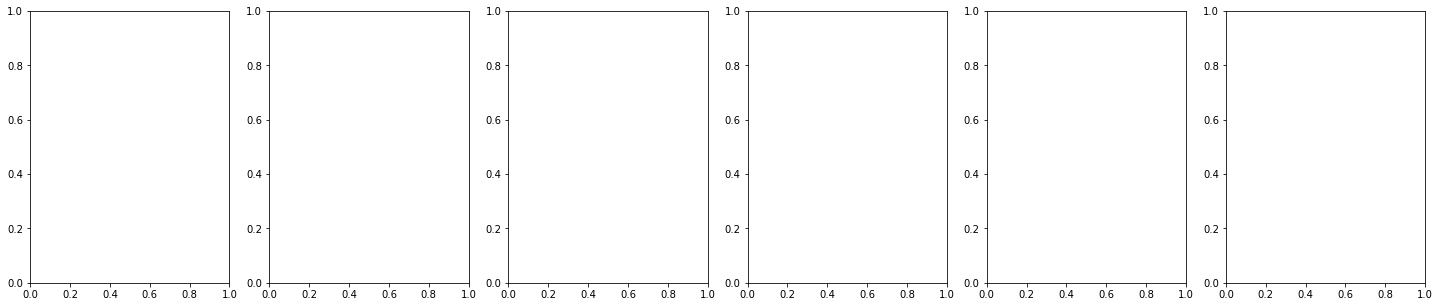

In [29]:
# num_samples = 6
# fig, ax = plt.subplots(1, num_samples, figsize=(25, 5))
# for i in range(num_samples):
#   ax[i].imshow(transforms.ToPILImage()(dataset[580][0]))
#   ax[i].axis('off')

fig, ax = plt.subplots(1, num_samples, figsize=(25, 5))
for i,y in enumerate(dataset[544:550]):
  ax[i].imshow((y[0]))

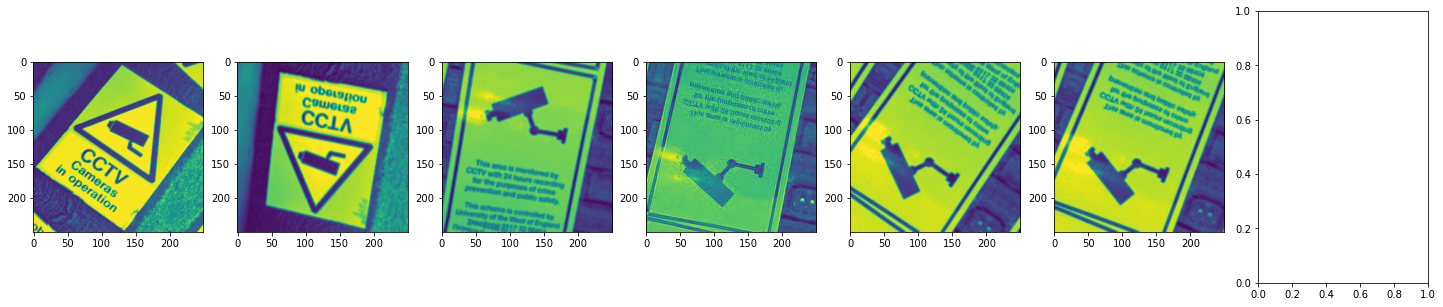

In [38]:
fig, ax = plt.subplots(1, num_samples, figsize=(25, 5))
for i,y in enumerate(dataset_augmented[544:550]):
  ax[i].imshow((y[0]))

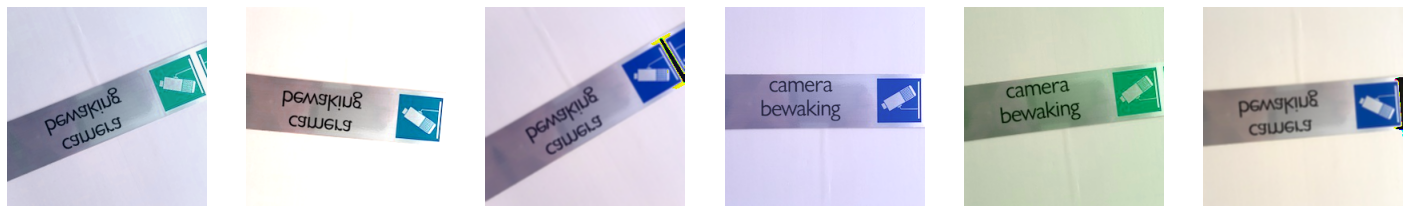

In [40]:
num_samples = 6
fig, ax = plt.subplots(1, num_samples, figsize=(25, 5))
for i in range(num_samples):
  ax[i].imshow(transforms.ToPILImage()(dataset[590][0]))
  ax[i].axis('off')

In [23]:
display(dataset_augmented[3])

tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.9246, 0.9246, 0.9295,  ..., 0.9983, 1.0000, 1.0000],
         [0.9246, 0.9246, 0.9295,  ..., 0.9983, 1.0000, 1.0000],
         [0.9246, 0.9295, 0.9295,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.9478, 0.9478, 0.9528,  ..., 1.0000, 1.0000, 1.0000],
         [0.9478, 0.9478, 0.9528,  ..., 1.0000, 1.0000, 1.0000],
         [0.9478, 0.9528, 0.9528,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

In [ ]:
display(